In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
%matplotlib inline

#from useful_functions.plotter import plot

idx = pd.IndexSlice

In [2]:
df_merged = pd.read_csv('df_merged_analysis.csv', index_col=0)

In [3]:
df_merged.head()

,statefips,date,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease,statename,shadow_index_normalized,Rt,ContainmentHealthIndex
0,1,2020-03-07,8.33,0.0,0.0,0.0,0.0,Alabama,7.647214,2.058230,14.74
1,1,2020-03-08,8.33,0.0,0.0,0.0,0.0,Alabama,6.104251,2.035865,14.74
2,1,2020-03-09,8.33,0.0,0.0,0.0,0.0,Alabama,7.227147,2.005499,14.74
3,1,2020-03-10,16.67,0.0,0.0,0.0,0.0,Alabama,6.999156,1.978277,20.51
4,1,2020-03-11,16.67,0.0,0.0,0.0,10.0,Alabama,6.644607,1.939723,20.51


In [46]:
df_merged = df_merged[df_merged['date'] >= '2020-07-01']   # the stationary part only

In [47]:
stationary_df = df_merged.groupby('statefips').mean()
stationary_df = stationary_sdi.rename(columns={'shadow_index_normalized':'mean_sdi'})

In [24]:
stationary_sdi.head()

,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease,mean_sdi,Rt,ContainmentHealthIndex
statefips,,,,,,,,
1,45.349571,1942.209524,28.314286,183.552381,8056.319048,34.588290,1.011381,51.185571
2,58.688714,242.066667,1.171429,5.361905,0.000000,52.676600,1.015914,58.025381
4,58.080524,3111.561905,51.504762,218.671429,13557.738095,49.255455,1.009456,60.719238
5,57.914714,1268.619048,21.047619,57.085714,0.000000,33.042840,1.006954,59.899571
6,64.104333,13925.971429,150.223810,0.000000,0.000000,53.243518,0.989849,64.781524


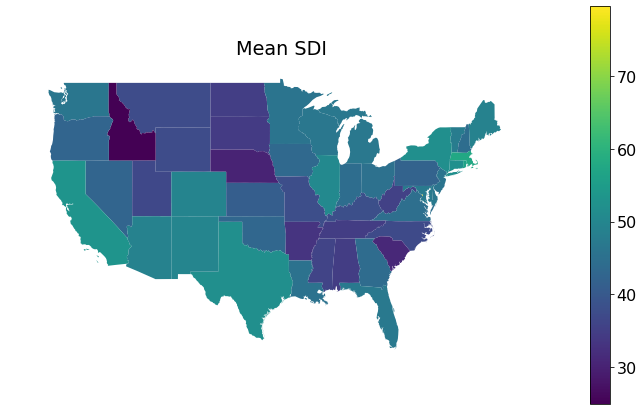

In [53]:
usa = gpd.read_file('./shapefile/states.shp')
usa = usa.set_index(['STATE_FIPS'])
usa.index = usa.index.rename('statefips').astype(int)
usa = usa.join(stationary_df)
plt.rc('font',  size=16) 
fig, ax = plt.subplots(1,figsize=(10,6))
usa.plot('mean_sdi', legend=True, ax=ax, cmap='viridis')
plt.axis('off')
plt.xlim(-130, -60)
plt.ylim(25,51)
plt.title('Mean SDI')
plt.tight_layout()
plt.savefig('MeanSDI.pdf')

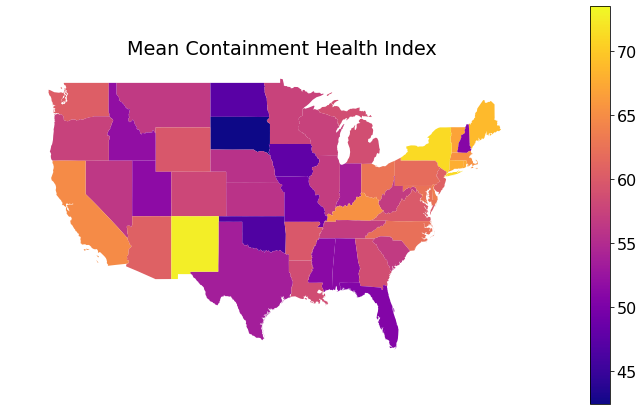

In [54]:
fig, ax = plt.subplots(1,figsize=(10,6))
usa.plot('ContainmentHealthIndex', legend=True, ax=ax, cmap='plasma')
plt.axis('off')
plt.xlim(-130, -60)
plt.ylim(25,51)
plt.title('Mean Containment Health Index')
plt.tight_layout()
plt.savefig('MeanContainmentHealthIndex.pdf')

In [4]:
state_info = pd.read_csv('State Characteristics - State Characteristics.csv')
state_info.tail()

,statefips,statename,stateabbrev,state_pop2019,Governor_info,Governor_name,Governor_Party,Vote_info,Vote_Party,ARS_Info,ARS_Info_Code,ARS_Region,ARS_Division,Mobility_FIPS,Mobility_info,1980_mobility
46,51,Virginia,VA,8535519,Governor of Virginia,Ralph Northam,Democratic,Virginia,Dem,Virginia,VA,South,South Atlantic,51,VA,0.479
47,53,Washington,WA,7614893,Governor of Washington,Jay Inslee,Democratic,Washington,Dem,Washington,WA,West,Pacific,53,WA,0.458
48,54,West Virginia,WV,1792147,Governor of West Virginia,Jim Justice,Republican,West Virginia,Rep,West Virginia,WV,South,South Atlantic,54,WV,0.499
49,55,Wisconsin,WI,5822434,Governor of Wisconsin,Tony Evers,Democratic,Wisconsin,Dem,Wisconsin,WI,Midwest,East North Central,55,WI,0.506
50,56,Wyoming,WY,578759,Governor of Wyoming,Mark Gordon,Republican,Wyoming,Rep,Wyoming,WY,West,Mountain,56,WY,0.490


In [5]:
df_merged_poli = df_merged.merge(state_info, on='statefips', how='left')
df_merged_poli.head()

,statefips,date,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease,statename_x,shadow_index_normalized,Rt,...,Governor_Party,Vote_info,Vote_Party,ARS_Info,ARS_Info_Code,ARS_Region,ARS_Division,Mobility_FIPS,Mobility_info,1980_mobility
0,1,2020-03-07,8.33,0.0,0.0,0.0,0.0,Alabama,7.647214,2.058230,...,Republican,Alabama,Rep,Alabama,AL,South,East South Central,1,AL,0.519
1,1,2020-03-08,8.33,0.0,0.0,0.0,0.0,Alabama,6.104251,2.035865,...,Republican,Alabama,Rep,Alabama,AL,South,East South Central,1,AL,0.519
2,1,2020-03-09,8.33,0.0,0.0,0.0,0.0,Alabama,7.227147,2.005499,...,Republican,Alabama,Rep,Alabama,AL,South,East South Central,1,AL,0.519
3,1,2020-03-10,16.67,0.0,0.0,0.0,0.0,Alabama,6.999156,1.978277,...,Republican,Alabama,Rep,Alabama,AL,South,East South Central,1,AL,0.519
4,1,2020-03-11,16.67,0.0,0.0,0.0,10.0,Alabama,6.644607,1.939723,...,Republican,Alabama,Rep,Alabama,AL,South,East South Central,1,AL,0.519


In [24]:
df_merged_poli.columns

Index(['statefips', 'date', 'Stringency', 'positiveIncrease', 'deathIncrease',
       'hospitalizedIncrease', 'totalTestsPeopleViralIncrease', 'statename_x',
       'shadow_index_normalized', 'Rt', 'ContainmentHealthIndex',
       'statename_y', 'stateabbrev', 'state_pop2019', 'Governor_info',
       'Governor_name', 'Governor_Party', 'Vote_info', 'Vote_Party',
       'ARS_Info', 'ARS_Info_Code', 'ARS_Region', 'ARS_Division',
       'Mobility_FIPS', 'Mobility_info', '1980_mobility'],
      dtype='object')

Text(0.5, 1.0, 'Mean SDI by Governor Party')

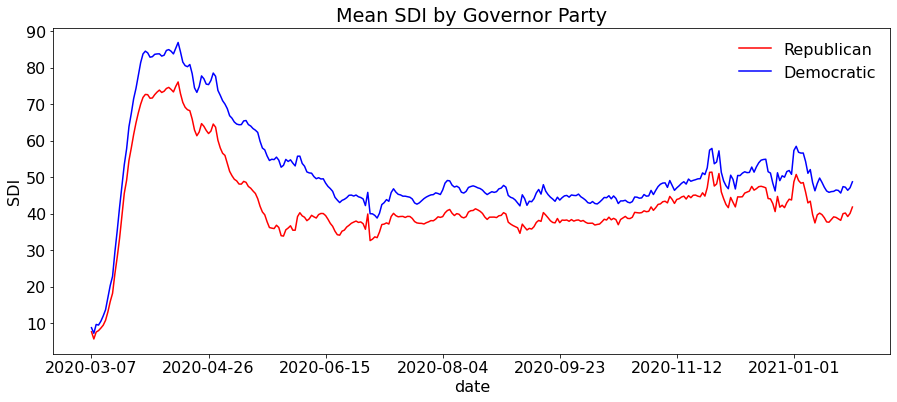

In [12]:
Rep = df_merged_poli[df_merged_poli.Governor_Party == 'Republican']
Dem = df_merged_poli[df_merged_poli.Governor_Party == 'Democratic']
plt.figure(figsize=(15,6))
plt.rc('font',  size=16) 
Rep.groupby('date')['shadow_index_normalized'].mean().plot(c='r', label='Republican')
Dem.groupby('date')['shadow_index_normalized'].mean().plot(c='b', label='Democratic')
plt.legend(frameon=False)
plt.ylabel('SDI')
plt.title('Mean SDI by Governor Party')

Text(0.5, 1.0, 'Mean SDI by Vote Party')

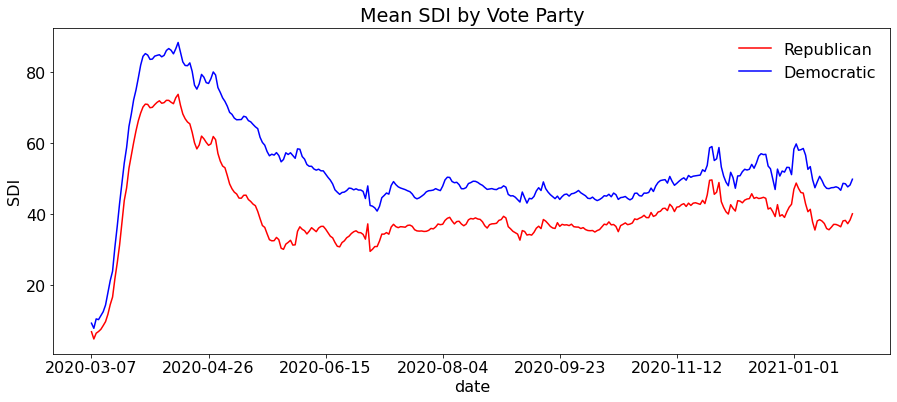

In [13]:
Rep = df_merged_poli[df_merged_poli.Vote_Party == 'Rep']
Dem = df_merged_poli[df_merged_poli.Vote_Party == 'Dem']
plt.figure(figsize=(15,6))
plt.rc('font',  size=16) 
Rep.groupby('date')['shadow_index_normalized'].mean().plot(c='r', label='Republican')
Dem.groupby('date')['shadow_index_normalized'].mean().plot(c='b', label='Democratic')
plt.legend(frameon=False)
plt.ylabel('SDI')
plt.title('Mean SDI by Vote Party')

Text(0.5, 1.0, 'Mean SDI across States by Governor Party and Voter Party')

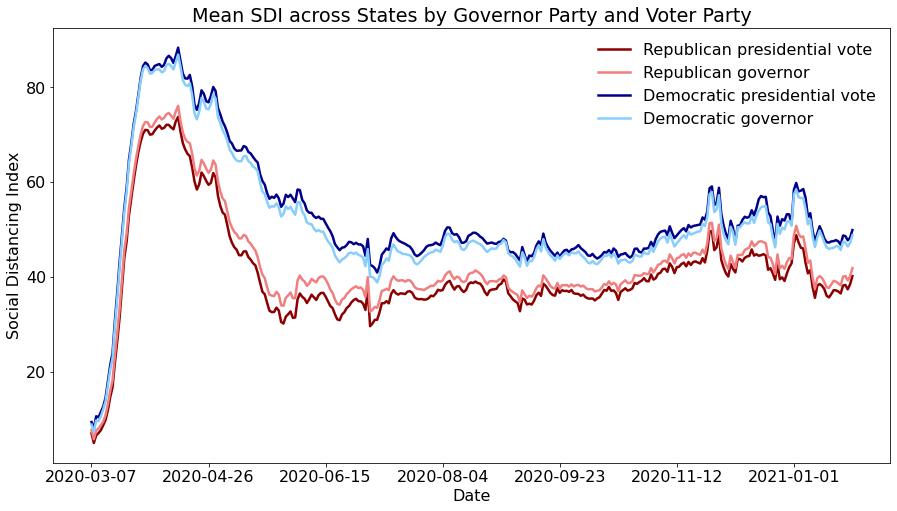

In [20]:
Rep_vote = df_merged_poli[df_merged_poli.Vote_Party == 'Rep']
Dem_vote = df_merged_poli[df_merged_poli.Vote_Party == 'Dem']
Rep_gov = df_merged_poli[df_merged_poli.Governor_Party == 'Republican']
Dem_gov = df_merged_poli[df_merged_poli.Governor_Party == 'Democratic']
plt.figure(figsize=(15,8))
plt.rc('font',  size=16) 
Rep_vote.groupby('date')['shadow_index_normalized'].mean().plot(c='darkred', lw=2.5, label='Republican presidential vote')
Rep_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='lightcoral', lw=2.5, label='Republican governor')
Dem_vote.groupby('date')['shadow_index_normalized'].mean().plot(c='darkblue', lw=2.5,label='Democratic presidential vote')
Dem_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='lightskyblue',lw=2.5, label='Democratic governor')
plt.ylabel('Social Distancing Index')
plt.xlabel('Date')
plt.legend(frameon=False)
plt.title('Mean SDI across States by Governor Party and Voter Party')

Text(0.5, 1.0, 'Mean SDI across States by Governor Party and Voter Party')

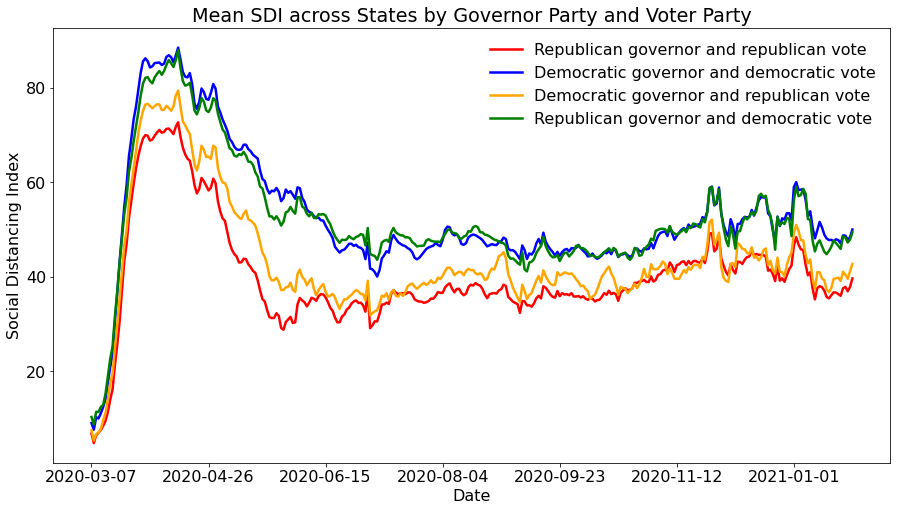

In [23]:
Rep_vote_Rep_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Rep') & (df_merged_poli.Governor_Party == 'Republican')]
Dem_vote_Dem_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Dem') & (df_merged_poli.Governor_Party == 'Democratic')]
Rep_vote_Dem_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Rep') & (df_merged_poli.Governor_Party == 'Democratic')]
Dem_vote_Rep_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Dem') & (df_merged_poli.Governor_Party == 'Republican')]
plt.figure(figsize=(15,8))
plt.rc('font',  size=16) 
Rep_vote_Rep_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='r',lw=2.5, label='Republican governor and republican vote')
Dem_vote_Dem_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='b',lw=2.5, label='Democratic governor and democratic vote')
Rep_vote_Dem_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='orange',lw=2.5,label='Democratic governor and republican vote')
Dem_vote_Rep_gov.groupby('date')['shadow_index_normalized'].mean().plot(c='g',lw=2.5, label='Republican governor and democratic vote')
plt.ylabel('Social Distancing Index')
plt.xlabel('Date')
plt.legend(frameon=False)
plt.title('Mean SDI across States by Governor Party and Voter Party')

Text(0.5, 1.0, 'Mean Containment Health Index across States by Governor Party and Voter Party')

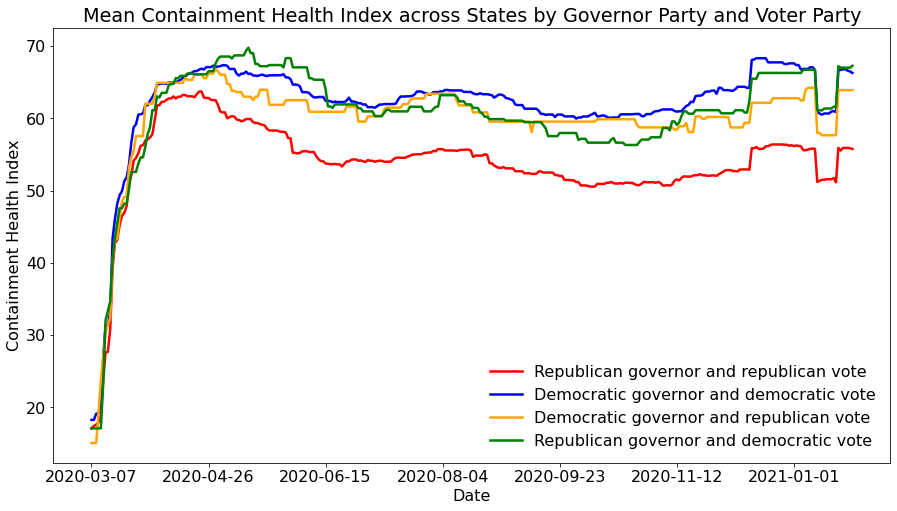

In [25]:
Rep_vote_Rep_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Rep') & (df_merged_poli.Governor_Party == 'Republican')]
Dem_vote_Dem_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Dem') & (df_merged_poli.Governor_Party == 'Democratic')]
Rep_vote_Dem_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Rep') & (df_merged_poli.Governor_Party == 'Democratic')]
Dem_vote_Rep_gov = df_merged_poli[(df_merged_poli.Vote_Party == 'Dem') & (df_merged_poli.Governor_Party == 'Republican')]
plt.figure(figsize=(15,8))
plt.rc('font',  size=16) 
Rep_vote_Rep_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='r',lw=2.5, label='Republican governor and republican vote')
Dem_vote_Dem_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='b',lw=2.5, label='Democratic governor and democratic vote')
Rep_vote_Dem_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='orange',lw=2.5,label='Democratic governor and republican vote')
Dem_vote_Rep_gov.groupby('date')['ContainmentHealthIndex'].mean().plot(c='g',lw=2.5, label='Republican governor and democratic vote')
plt.ylabel('Containment Health Index')
plt.xlabel('Date')
plt.legend(frameon=False)
plt.title('Mean Containment Health Index across States by Governor Party and Voter Party')

In [24]:
adherence = iso_index['shadow_index_normalized'] - case_data['Stringency']

In [25]:
mean_adherence = adherence.groupby('statefips').mean()
mean_adherence = mean_adherence.rename('mean_adherence')

In [32]:
usa = gpd.read_file('../data/US_States/shapefile/states.shp')
usa = usa.set_index(['STATE_FIPS'])
usa.index = usa.index.rename('statefips').astype(int)

In [34]:
usa = usa.join(mean_adherence)

(25.0, 51.0)

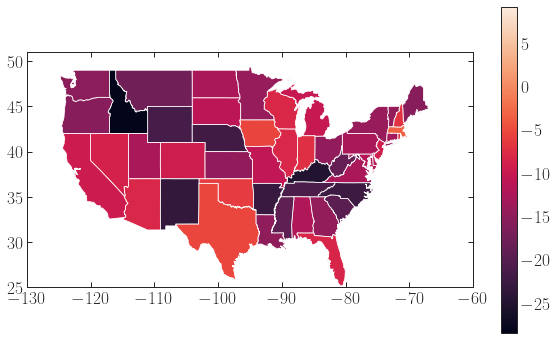

In [42]:
fig, ax = plot(figsize=(10,6))
usa.plot('mean_adherence', legend=True, ax=ax)
plt.xlim(-130, -60)
plt.ylim(25,51)

In [20]:
mean_adherence

# The more negative this is, the lower our index is relative to government stringency
# This isn't all adherence really, since it also has to do with economic recovery

statefips
1    -12.147675
2     -9.905668
4     -8.138586
5    -22.769690
6     -9.517697
8     -9.395829
9    -12.921421
10   -12.034249
11     9.176626
12    -8.284502
13   -14.576081
15   -15.396006
16   -28.434148
17    -8.078894
18    -7.183049
19    -5.408090
20   -14.725248
21   -24.998472
22   -14.793609
23   -15.645465
24   -11.587495
25    -3.207133
26    -9.982102
27   -14.253523
28   -19.213615
29   -10.641400
30   -17.424088
31   -21.884864
32    -8.618357
33    -6.873723
34    -9.143398
35   -23.380379
36   -14.054420
37   -22.511449
38   -12.455662
39   -14.678305
40    -6.217601
41   -15.616513
42   -12.537134
44    -7.647941
45   -19.608929
46   -11.044310
47   -21.017715
48    -5.351702
49   -12.664535
50   -14.420092
51   -12.662307
53   -15.221816
54   -18.535110
55    -7.977802
56   -21.417873
dtype: float64